## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Solieman Snossy 
 

In [28]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    

In [29]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data = pd.read_csv(url)
print("Data Imported Success")

Data Imported Success


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

### Exploratory Data Analysis
 

In [37]:
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [38]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


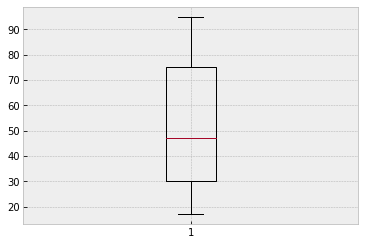

In [51]:
# Plotting the distribution of scores
plt.style.use("bmh")
fig, ax= plt.subplots() 
ax.boxplot(Data["Scores"])
plt.show()

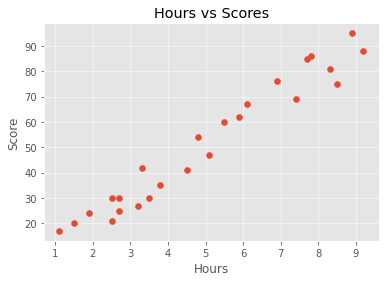

In [52]:
# Plotting the distribution of scores
plt.style.use("ggplot")
fig, ax= plt.subplots()
ax.scatter(Data["Hours"], Data["Scores"])
plt.title("Hours vs Scores")
ax.set_xlabel("Hours")
ax.set_ylabel("Score")
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [64]:
x = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [65]:
# using Scikit-Learn
from sklearn.model_selection import train_test_split 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [66]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [69]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
print("Training Complete")

Training Complete


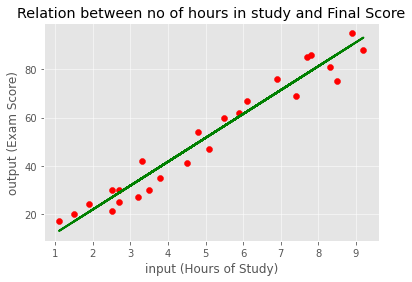

In [84]:
# Plotting the regression line
line = LR.coef_*x+ LR.intercept_

# Plotting for the test data
fig, ax= plt.subplots()
plt.scatter(x, y, color='r')
plt.plot(x, line, color='g')
ax.set_xlabel("input (Hours of Study)")
ax.set_ylabel("output (Exam Score)")
plt.title("Relation between no of hours in study and Final Score")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [72]:
  # Testing data - In Hours
print("Testing Data:", x_test)
  # Predicting the scores
y_pred = LR.predict(x_test)
print("perdicted Values:", y_pred)


Testing Data: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
perdicted Values: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [74]:
# Comparing Actual vs Predicted
ComparisonDF = pd.DataFrame({"Actual":y_test, "Predicted":y_pred, "errorValue":y_test-y_pred})
ComparisonDF 

,Actual,Predicted,errorValue
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [81]:
# You can also test with your own data
newRecord = [[9.25]]
print("No of Hours = {}".format(newRecord[0][0]))
print("Predicted Score = {}".format(LR.predict(newRecord)[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
